In [347]:
import seaborn as sns
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier

In [348]:
df=pd.read_csv('G:/Churn_Modelling(1).csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# data understanding

In [349]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [350]:
df.corr()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,1.000000,0.004202,0.005840,0.000783,-0.006495,-0.009067,0.007246,0.000599,0.012044,-0.005988,-0.016571
CustomerId,0.004202,1.000000,0.005308,0.009497,-0.014883,-0.012419,0.016972,-0.014025,0.001665,0.015271,-0.006248
CreditScore,0.005840,0.005308,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,0.000783,0.009497,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,-0.006495,-0.014883,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,-0.009067,-0.012419,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.007246,0.016972,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,0.000599,-0.014025,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.012044,0.001665,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.005988,0.015271,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097


In [351]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# data preparation 

In [352]:
Gender2=df.Gender.replace(to_replace=['Female','Male'], value=[0, 1])

In [353]:
df.insert(4,"Gender2",Gender2)

In [354]:
Geography2=df.Geography.replace(to_replace=['Spain','Germany','France'], value=[0,1,2])

In [355]:
df.insert(4,"Geography2",Geography2)

In [356]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography2       10000 non-null  int64  
 5   Gender2          10000 non-null  int64  
 6   Geography        10000 non-null  object 
 7   Gender           10000 non-null  object 
 8   Age              10000 non-null  int64  
 9   Tenure           10000 non-null  int64  
 10  Balance          10000 non-null  float64
 11  NumOfProducts    10000 non-null  int64  
 12  HasCrCard        10000 non-null  int64  
 13  IsActiveMember   10000 non-null  int64  
 14  EstimatedSalary  10000 non-null  float64
 15  Exited           10000 non-null  int64  
dtypes: float64(2), int64(11), object(3)
memory usage: 1.1+ MB


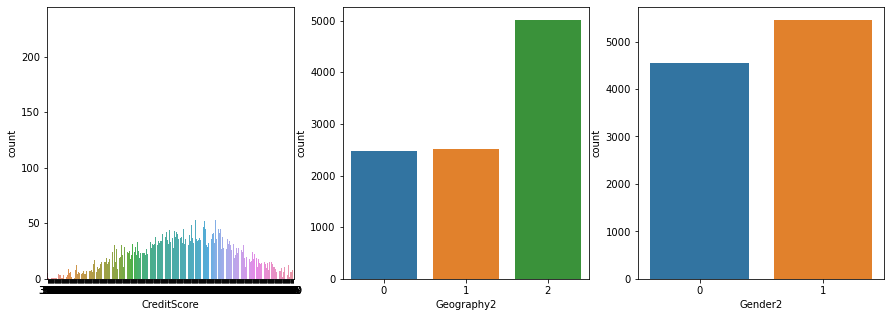

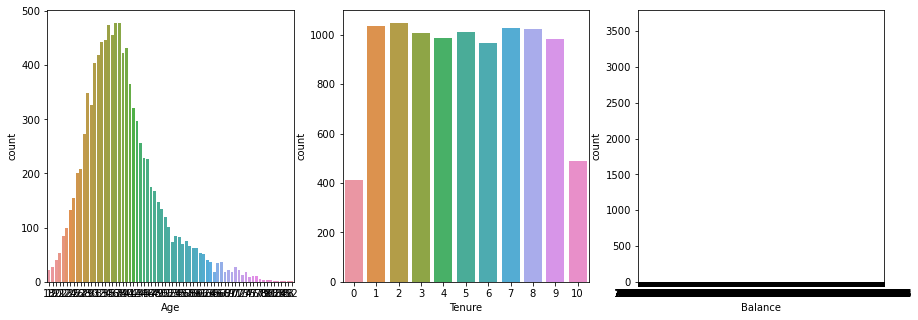

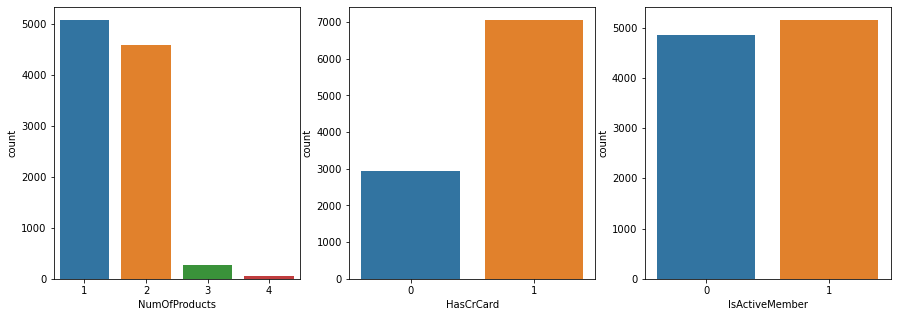

In [419]:
categorical=categorical=[ 'CreditScore','Geography2','Gender2','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember']
i=0
while i<9:
    fig=plt.figure(figsize=[15,5])
    plt.subplot(1,3,1)
    sns.countplot(x=categorical[i],data=df)
    i+=1
    
    plt.subplot(1,3,2)
    sns.countplot(x=categorical[i],data=df)
    i+=1
    plt.subplot(1,3,3)
    sns.countplot(x=categorical[i],data=df)
    i+=1
    
    plt.show

In [358]:
  sns.countplot(df['EstimatedSalary'])


# modeling 

In [359]:
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# SVM

In [360]:


X3= pd.DataFrame(df, columns = ['CreditScore','Geography2','Gender2','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary'])
y3=df['Exited'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X3,y3,test_size=0.1 ,random_state=0)
clf = make_pipeline(StandardScaler(), SVC(gamma='auto',kernel='rbf',C=10.0))
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)

C:\Users\Asus\anaconda3\lib\site-packages\sklearn\utils\validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [361]:
YSVM= pd.DataFrame(clf.predict(X3))


# AdaBoostClassifier

In [362]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

columns = list(X3.columns)
for col in range(0 , len(columns)) :
    X3[columns[col]] = X3[columns[col]].astype(float)



X = X3[columns].values
Y = df['Exited'].values

X_train1 , X_test1 , Y_train1 , Y_test1 = train_test_split(X , Y , test_size=0.1 , random_state= 4)

clf4 = AdaBoostClassifier(n_estimators=100)
clf4.fit(X_train1, Y_train1)
Y_test_hat4 =clf4 .predict(X_test1)

In [363]:
YABC= pd.DataFrame(Y,clf4.predict(X))


# HistGradientBoostingClassifier

In [364]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.datasets import make_hastie_10_2
columns = list(X3.columns)
for col in range(0 , len(columns)) :
    X3[columns[col]] = X3[columns[col]].astype(float)


X = X3[columns].values
Y = df['Exited'].values


X_train2 , X_test2 , Y_train2 , Y_test2 = train_test_split(X , Y , test_size=0.1, random_state= 4)

clf2 = HistGradientBoostingClassifier(max_iter=100).fit(X_train2, Y_train2)

Y_test_hat2=clf2 .predict(X_test2)


In [365]:
YHGBC= pd.DataFrame(clf2.predict(X) )


# BaggingClassifier

In [366]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
bagging = BaggingClassifier(KNeighborsClassifier(),
                             max_samples=0.5, max_features=0.5)

columns = list(X3.columns)
for col in range(0 , len(columns)) :
    X3[columns[col]] = X3[columns[col]].astype(float)
    
X = X3[columns].values
Y = df['Exited'].values



X_train3 , X_test3 , Y_train3 , Y_test3 = train_test_split(X , Y , test_size=0.1, random_state= 4)
bagging.fit(X_train3, Y_train3)
Y_test_hat1 =bagging .predict(X_test3)

In [367]:
YBG= pd.DataFrame(bagging.predict(X))


# Logreg

In [368]:
columns = list(X3.columns)
for col in range(0 , len(columns)) :
    X3[columns[col]] = X3[columns[col]].astype(float)
    
X = X3[columns].values
Y = df['Exited'].values
X_train4 , X_test4 , Y_train4 , Y_test4 = train_test_split(X , Y , test_size=0.1, random_state= 4)

logreg1 =LogisticRegression(solver='liblinear')
logreg1.fit(X_train4,Y_train4)
y_pred1 = logreg1.predict(X_test4)

In [369]:
YLR= pd.DataFrame(logreg1.predict(X))

# RandomForestClassifier

In [370]:
columns = list(X3.columns)
for col in range(0 , len(columns)) :
    X3[columns[col]] = X3[columns[col]].astype(float)
    
X = X3[columns].values
Y = df['Exited'].values
X_train5 , X_test5 , Y_train5 , Y_test5 = train_test_split(X , Y , test_size=0.1, random_state= 4)
RandomForest=RandomForestClassifier(n_estimators=50,max_depth=3)
RandomForest.fit(X_train5,Y_train5)
y_pred5=RandomForest.predict(X_test5)

In [371]:
YRFC= pd.DataFrame(RandomForest.predict(X))


# Evaluation:

# Evaluation of SVM 


In [372]:
print("Accuracy of svm,:",metrics.accuracy_score(y_test,y_pred))

Accuracy of svm,: 0.868


In [373]:
confusion_matrix(y3,clf.predict(X3))

array([[7804,  159],
       [1014, 1023]], dtype=int64)

In [374]:
f1_score(y_test, y_pred, average='macro')

0.7581194889724476

In [375]:
recall_score(y_test, y_pred
             , average='macro')

0.7209532659998532

In [376]:
precision_score(y_test, y_pred, average='macro')

0.8422348484848485

# Evaluation of AdaBoostClassifier


In [377]:
print("Accuracy of Evaluation of AdaBoostClassifier,:",metrics.accuracy_score(Y_test1,Y_test_hat4 ))

Accuracy of Evaluation of AdaBoostClassifier,: 0.866


In [378]:
confusion_matrix(Y,clf4.predict(X))

array([[7618,  345],
       [1057,  980]], dtype=int64)

In [379]:
f1_score(Y_test1, Y_test_hat4, average='macro')

0.767965367965368

In [380]:
recall_score(Y_test1, Y_test_hat4
             , average='macro')

0.7460917498467043

In [381]:
precision_score(Y_test1, Y_test_hat4, average='macro')

0.8004028057503993

# Evaluation of HistGradientBoostingClassifier

In [382]:
print("Accuracy of Evaluation of HistGradientBoostingClassifier,:",metrics.accuracy_score(Y_test2,Y_test_hat2 ))

Accuracy of Evaluation of HistGradientBoostingClassifier,: 0.871


In [383]:
confusion_matrix(Y,clf2.predict(X))

array([[7799,  164],
       [ 771, 1266]], dtype=int64)

In [384]:
f1_score(Y_test2, Y_test_hat2, average='macro')

0.7730275833067947

In [385]:
recall_score(Y_test2,Y_test_hat2
             , average='macro')

0.7472896688180743

In [386]:
precision_score(Y_test,Y_test_hat2, average='macro')

0.8137451477334703

# Evaluation of BaggingClassifier

In [387]:
print("Accuracy of Evaluation BaggingClassifier ,:",metrics.accuracy_score(Y_test3,Y_test_hat1 ))

Accuracy of Evaluation BaggingClassifier ,: 0.805


In [388]:
confusion_matrix(Y,bagging.predict(X))

array([[7960,    3],
       [1953,   84]], dtype=int64)

In [389]:
f1_score(Y_test3, Y_test_hat4, average='macro')

0.767965367965368

In [390]:
recall_score(Y_test3, Y_test_hat1
             , average='macro')

0.5069915481917429

In [391]:
precision_score(Y_test3, Y_test_hat1, average='macro')

0.7776104417670683

# Evaluation of Logreg

In [392]:
print("Accuracy of Evaluation of LOGREG,:",metrics.accuracy_score(Y_test4,y_pred1 ))

Accuracy of Evaluation of LOGREG,: 0.799


In [393]:
confusion_matrix(Y,logreg1.predict(X))

array([[7753,  210],
       [1898,  139]], dtype=int64)

In [394]:
f1_score(Y_test4, y_pred1, average='macro')

0.5153999156169007

In [395]:
recall_score(Y_test4, y_pred1
             , average='macro')

0.5300712429910678

In [396]:
precision_score(Y_test4, y_pred1, average='macro')

0.6301291169712222

# Evaluation of random forest

In [397]:
print("Accuracy of Evaluation of  random forest,:",metrics.accuracy_score(Y_test5,y_pred5))

Accuracy of Evaluation of  random forest,: 0.832


In [398]:
confusion_matrix(Y,RandomForest.predict(X))

array([[7944,   19],
       [1732,  305]], dtype=int64)

In [399]:
f1_score(Y_test5, y_pred5, average='macro')

0.5873249815770081

In [400]:
recall_score(Y_test5, y_pred5
             , average='macro')

0.5774348730332319

In [401]:
precision_score(Y_test5, y_pred5, average='macro')

0.8838644981354392

# Deployment

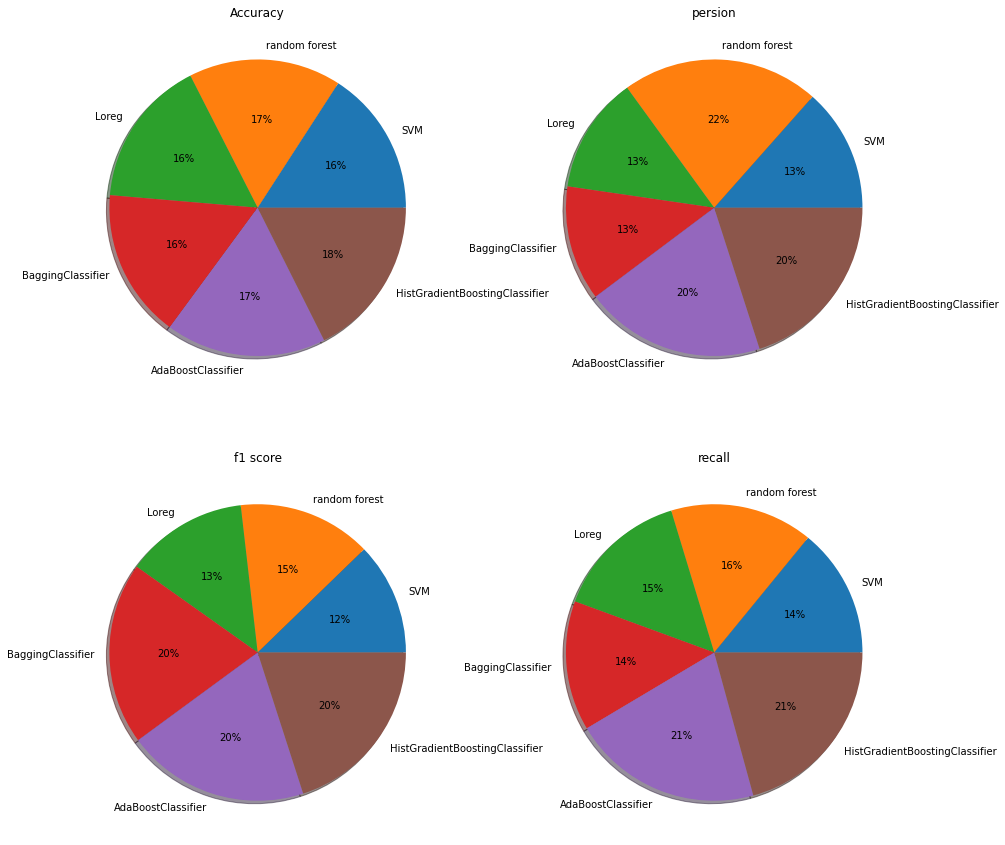

In [402]:
import matplotlib.pyplot as plt


labels1 =  ['SVM','random forest','Loreg','BaggingClassifier','AdaBoostClassifier','HistGradientBoostingClassifier']
Accuracy= [0.785,0.824,0.799,0.805,0.866,0.871]

labels2=['SVM','random forest','Loreg','BaggingClassifier','AdaBoostClassifier','HistGradientBoostingClassifier']
persion=[0.5464009744585284,0.8745765292527883,0.5153999156169007,0.5095296192577328,0.8004028057503993,0.8137451477334703]

labels3=['SVM','random forest','Loreg','BaggingClassifier','AdaBoostClassifier','HistGradientBoostingClassifier'] 
f1_score=[0.4729312551765681,0.5626206563706564,0.5153999156169007,0.767965367965368,0.767965367965368,0.7730275833067947]

labels4=['SVM','random forest','Loreg','BaggingClassifier','AdaBoostClassifier','HistGradientBoostingClassifier'] 
recall=[0.5074527402117825,0.5622064466372929,0.5300712429910678,0.5095296192577328,0.7460917498467043,0.7472896688180743]

fig, axs = plt.subplots(2, 2,figsize=(15, 15))


axs[0, 0].pie(Accuracy, labels=labels1, autopct='%.0f%%', shadow=True)
axs[0, 0].title.set_text('Accuracy')


axs[0, 1].pie(persion, labels=labels2, autopct='%.0f%%', shadow=True)
axs[0, 1].title.set_text('persion')

axs[1, 0].pie(f1_score, labels=labels3,autopct='%.0f%%',shadow=True)
axs[1, 0].title.set_text('f1 score')

axs[1, 1].pie(recall, labels=labels4,autopct='%.0f%%',shadow=True)
axs[1, 1].title.set_text('recall') 



plt.show()

# the best model isHistGradientBoostingClassifier 

In [403]:
df.insert(4,"YRFC",YRFC)

In [405]:
df.insert(4,"YRL",YLR)

In [406]:
df.insert(4,"YHGBC",YHGBC)

In [407]:
df.insert(4,"YSVM",YSVM)

In [408]:
df.insert(4,"YABC",YABC)

In [410]:
df.insert(4,"YBC",YBG)

In [412]:
df

,RowNumber,CustomerId,Surname,CreditScore,YBC,YABC,YSVM,YBG,YRL,YRFC,...,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,1,0,0,0,0,...,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,0,0,0,0,0,0,...,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,1,1,0,0,1,...,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,0,0,0,0,...,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,0,0,0,0,0,0,...,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,0,0,0,0,0,0,...,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,0,0,0,0,0,0,...,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,0,1,0,0,0,0,...,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,0,1,0,0,0,0,...,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [414]:
df.to_csv('G:/dision.csv')

#    که پیشبینی شده است به دیتا اضاف شده Exitedتمام خروجی 